# Unit 4: Applied Machine Learning 2
## Task 5: Decision trees and random forest
###### Candelaria Retamal
###### **22.06.2022**


#### 5.1. Decision trees depth of 3
What accuracy can you achieve using a decision trees with a depth of 3? Plot the corresponding decision tree with plot_tree()

---

> **Solution**: 

In [1]:
import numpy as np
import os

# Load data
with np.load("features_trainset.npz") as npz_file:
    X_tr = npz_file["data"]
    y_tr = npz_file["label"]

print("X:", X_tr.shape, X_tr.dtype)
print("y:", y_tr.shape, y_tr.dtype)

with np.load("features_testset.npz") as npz_file:
    X_te = npz_file["data"]
    y_te = npz_file["label"]

print("X:", X_tr.shape, X_tr.dtype)
print("y:", y_tr.shape, y_tr.dtype)

print("X:", X_te.shape, X_te.dtype)
print("y:", y_te.shape, y_te.dtype)

# Convert to float
X_tr = X_tr.astype(np.float)
X_te = X_te.astype(np.float)
# Print the new data type
print('dtype:', X_tr.dtype)
print('dtype:', X_te.dtype)

X: (280, 1280) float32
y: (280, 6) float32
X: (280, 1280) float32
y: (280, 6) float32
X: (50, 1280) float32
y: (50, 6) float32
dtype: float64
dtype: float64


In [2]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

In [3]:
# Fit decision tree
dt.fit(X_tr, y_tr)

# Get score
dt.score(X_tr, y_tr)

0.6357142857142857

In [4]:
y_pred = dt.predict(X_te)

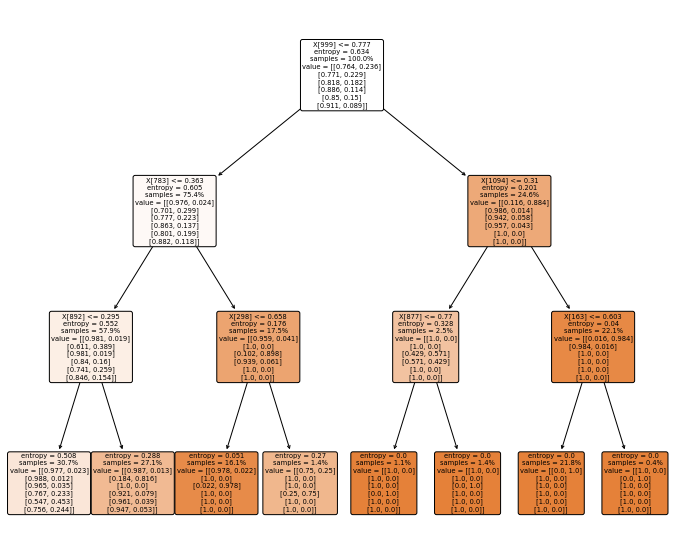

In [5]:
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plot_tree(
    dt,
    filled=True,
    rounded=True,
    proportion=True,
)
plt.show()

#### 5.2. Tune Depth
Tune the depth of your decision tree. Does it improve the accuracy?

---

> **Solution**:

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={"max_depth" : [1,3,5,7,9,11,12]}

# calculating different regression metrics

from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dt,param_grid=parameters)
tuning_model.fit(X_tr, y_tr)
# best hyperparameters 
print(tuning_model.best_params_)
# Accuracy
# Get score
tuning_model.best_score(X_tr, y_tr)

#### 5.3. Random forest
Try a random forest model and tune the number of trees and their depth. 
* Does increasing the number of trees help? 
* Is there an optimal depth and how does it compare to your decision tree above?

---

> **Solution**:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a decision tree
rf = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=0, criterion="entropy")

# Fit estimator
rf.fit(X_tr, y_tr)
rf.score(X_tr, y_tr)

In [ ]:
parameters={"max_depth" : [1,3,5,7,9,11,12], "n_estimators" : [1,2,3,4,5,6,7,8,9,10, 15,20,25,50,100]}

from sklearn.model_selection import GridSearchCV
rf_tune_model=GridSearchCV(rf,param_grid=parameters)
rf_tune_model.fit(X_tr, y_tr)
# best hyperparameters 
print(rf_tune_model.best_params_)
# Accuracy
# Get score
rf_tune_model.best_score_(X_tr, y_tr)

#### 5.4. Importance of features

The random forest estimator provides a ranking of the features according to their importance in the classification task via thefeature_importances_ attribute. Find the the top 5 important features and visualize their importance scores.

---

> **Solution**:

#### 5.5. Compare the results

Are these top features similar to the ones you found based on the coefficients in the logistic regression task, and also during the data exploration in the last question of Task 1?